In [1]:
import scipy
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
case = "RTS24_mod1"

In [3]:
## Load input data 
df_input_input = pd.read_csv(f"../Data/{case}_DC_fy/input_f_sc01_Network_Existing_Generation_Full_2030.csv")
df_input_OPC = pd.read_csv("../06.Benchmarking/B.Operation_cost/RTS24_mod1/3.Out/oT_Result_GenerationCost_RTS24_mod1.csv")
df_input_LB = pd.read_csv("../06.Benchmarking/E.Representative_days_based_on_Line_Benefits_OptModel/RTS24_mod1/3.Out/oT_LineBenefit_Data_RTS24_mod1.csv")
df_input_CHI =pd.read_csv("../06.Benchmarking/L.Cont_Investments_per_hour/RTS24_mod1/3.Out/oT_Hourly_Investments_RTS24_mod1.csv",header = [0,1,2,3,4])
df_input_CHI.columns = ['_'.join(map(str, x)) for x in df_input_CHI.columns.droplevel(0).droplevel(3)]


In [4]:
# import sys
# sys.path.insert(0, "../03.ANN_CostEstimator_For_LB/")
# import DataLoading

# sc = "sc01"
# period = "2030"
# folder = "../Data/RTS24_mod1_DC_fy/"
# all_executions = DataLoading.list_executions(folder=folder,per = period,sc=sc)

# _,dfs_LB = DataLoading.load_data_ext_out(folder,all_executions,period,sc)

# def calculate_lb_from_dfs_out(dfs_out,execution): 
#     return (dfs_out["Network_Existing_Generation_Full"].sum(axis=1) - dfs_out[execution].sum(axis=1))

# df_input_LB = pd.DataFrame()
# for ex in all_executions:
#     df_input_LB[ex] = calculate_lb_from_dfs_out(dfs_LB,ex)
# df_input_LB = df_input_LB.reset_index()

In [5]:
df_input_input

,LoadLevel,101_PV_1,101_PV_2,101_PV_3,101_PV_4,102_PV_1,102_PV_2,103_PV_1,104_PV_1,113_PV_1,...,N_123,N_124,N_101_N_102_cac1,N_103_N_124_cac1,N_106_N_108_cac1,N_109_N_111_cac1,N_115_N_116_cac1,N_116_N_117_cac1,N_117_N_118_cac1,N_118_N_121_cac1
0,01-01 00:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,01-01 01:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2,01-01 02:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
3,01-01 03:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
4,01-01 04:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8731,12-30 19:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
8732,12-30 20:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
8733,12-30 21:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
8734,12-30 22:00:00+01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


In [6]:
df_input_OPC

,Period,Scenario,LoadLevel,mEUR
0,2030,sc01,01-01 00:00:00+01:00,0.786941
1,2030,sc01,01-01 01:00:00+01:00,0.720007
2,2030,sc01,01-01 02:00:00+01:00,0.650457
3,2030,sc01,01-01 03:00:00+01:00,0.596555
4,2030,sc01,01-01 04:00:00+01:00,0.561040
...,...,...,...,...
8731,2030,sc01,12-30 19:00:00+01:00,2.121835
8732,2030,sc01,12-30 20:00:00+01:00,1.256933
8733,2030,sc01,12-30 21:00:00+01:00,1.114516
8734,2030,sc01,12-30 22:00:00+01:00,1.007027


In [7]:
df_input_LB

,LoadLevel,Network_Line_Out_N_101_N_102_cac1,Network_Line_Out_N_103_N_124_cac1,Network_Line_Out_N_106_N_108_cac1,Network_Line_Out_N_109_N_111_cac1,Network_Line_Out_N_115_N_116_cac1,Network_Line_Out_N_116_N_117_cac1,Network_Line_Out_N_117_N_118_cac1,Network_Line_Out_N_118_N_121_cac1
0,01-01 00:00:00+01:00,-0.000093,-0.057339,0.056840,0.012169,-0.191021,0.599737,0.256919,0.676515
1,01-01 01:00:00+01:00,-0.000070,-0.055392,0.053816,0.011177,-0.219981,0.629444,0.271569,0.660848
2,01-01 02:00:00+01:00,-0.000067,-0.049742,0.044583,0.009522,-0.218524,0.657645,0.280109,0.646064
3,01-01 03:00:00+01:00,-0.000074,-0.047189,0.026992,0.009182,-0.185082,0.547109,0.238146,0.526177
4,01-01 04:00:00+01:00,-0.000043,-0.039189,0.025720,0.008093,-0.128855,0.522983,0.225438,0.508162
...,...,...,...,...,...,...,...,...,...
8731,12-30 19:00:00+01:00,0.000076,-0.105760,0.000163,0.019141,-0.041713,1.167899,0.535218,0.943404
8732,12-30 20:00:00+01:00,0.000050,-0.087815,0.000076,0.013587,-0.117447,1.017111,0.449743,0.997976
8733,12-30 21:00:00+01:00,-0.000347,-0.068526,0.000143,0.011006,-0.075725,0.615699,0.255592,0.825673
8734,12-30 22:00:00+01:00,-0.000601,-0.075255,0.082305,0.014531,-0.030839,0.654319,0.277314,0.774386


In [8]:
df_input_CHI.sum()

Unnamed: 0_level_1_Unnamed: 0_level_2_Unnamed: 0_level_3    01-01 00:00:00+01:0001-01 01:00:00+01:0001-01 ...
N_106_N_108_cac2                                                                                    97.750447
N_117_N_118_cac3                                                                                     1.302424
N_118_N_121_cac2                                                                                    584.97607
N_116_N_117_cac2                                                                                    434.58489
N_117_N_118_cac2                                                                                     7.430924
N_115_N_116_cac1                                                                                   243.355368
N_103_N_124_cac1                                                                                    26.614685
N_109_N_111_cac1                                                                                    12.123181
N_115_N_11

In [9]:
excluded_str = "cac"
# Filter columns that do not contain the exclude_str
filtered_columns = [col for col in df_input_input.columns if excluded_str not in col]

# Select the filtered columns
filtered_df_input_input = df_input_input[filtered_columns]

In [10]:
df_input_LB

,LoadLevel,Network_Line_Out_N_101_N_102_cac1,Network_Line_Out_N_103_N_124_cac1,Network_Line_Out_N_106_N_108_cac1,Network_Line_Out_N_109_N_111_cac1,Network_Line_Out_N_115_N_116_cac1,Network_Line_Out_N_116_N_117_cac1,Network_Line_Out_N_117_N_118_cac1,Network_Line_Out_N_118_N_121_cac1
0,01-01 00:00:00+01:00,-0.000093,-0.057339,0.056840,0.012169,-0.191021,0.599737,0.256919,0.676515
1,01-01 01:00:00+01:00,-0.000070,-0.055392,0.053816,0.011177,-0.219981,0.629444,0.271569,0.660848
2,01-01 02:00:00+01:00,-0.000067,-0.049742,0.044583,0.009522,-0.218524,0.657645,0.280109,0.646064
3,01-01 03:00:00+01:00,-0.000074,-0.047189,0.026992,0.009182,-0.185082,0.547109,0.238146,0.526177
4,01-01 04:00:00+01:00,-0.000043,-0.039189,0.025720,0.008093,-0.128855,0.522983,0.225438,0.508162
...,...,...,...,...,...,...,...,...,...
8731,12-30 19:00:00+01:00,0.000076,-0.105760,0.000163,0.019141,-0.041713,1.167899,0.535218,0.943404
8732,12-30 20:00:00+01:00,0.000050,-0.087815,0.000076,0.013587,-0.117447,1.017111,0.449743,0.997976
8733,12-30 21:00:00+01:00,-0.000347,-0.068526,0.000143,0.011006,-0.075725,0.615699,0.255592,0.825673
8734,12-30 22:00:00+01:00,-0.000601,-0.075255,0.082305,0.014531,-0.030839,0.654319,0.277314,0.774386


In [11]:
df_input = pd.concat([filtered_df_input_input.iloc[:,1:],df_input_OPC["mEUR"],df_input_LB.iloc[:,1:],df_input_CHI.iloc[:,2:]],axis=1)

df_input = pd.concat([filtered_df_input_input.iloc[:,1:],df_input_OPC["mEUR"],df_input_CHI.iloc[:,2:]],axis=1)
df_input = pd.concat([filtered_df_input_input.iloc[:,1:],df_input_OPC["mEUR"],df_input_LB.iloc[:,1:]],axis=1)

df_input = pd.concat([filtered_df_input_input.iloc[:,1:],df_input_LB.iloc[:,1:]],axis=1)



# df_input = pd.concat([filtered_df_input_input.iloc[:,1:],df_input_OPC["mEUR"]],axis=1)
# df_input = pd.concat([filtered_df_input_input.iloc[:,1:],df_input_LB.iloc[:,2:]],axis=1)
#df_input = pd.concat([df_input_OPC["mEUR"],df_input_LB.iloc[:,2:]],axis=1)

feature_list = list(df_input.columns)

In [12]:
## Load output data example
df_output = pd.read_csv(f"../06.Benchmarking/L.Cont_Investments_per_hour/{case}/3.Out/oT_Hourly_Investments_RTS24_mod1.csv",header = [0,1,2,3,4])

In [13]:
# Convert to numpy arrays
#All input
input_array = np.array(df_input)
#And a single output coumn
output_array = np.array(df_output.iloc[:,1:])

In [14]:
# Split into train and test sets 
train_features, test_features, train_labels, test_labels = train_test_split(input_array,output_array,test_size=0.2,random_state=42)

In [15]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (6988, 53)
Training Labels Shape: (6988, 21)
Testing Features Shape: (1748, 53)
Testing Labels Shape: (1748, 21)


In [16]:
# The baseline predictions are the averages
baseline_preds = np.tile(np.mean(test_labels,axis=0),len(test_labels)).reshape(test_labels.shape[0],test_labels.shape[1])
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  0.04


In [17]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 20, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=20, random_state=42)

In [18]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae), we do this to compare it with the base case prediction to check if the model somewhat makes sense 
print('Mean Absolute Error:', round(np.mean(errors), 5))

Mean Absolute Error: 0.01809


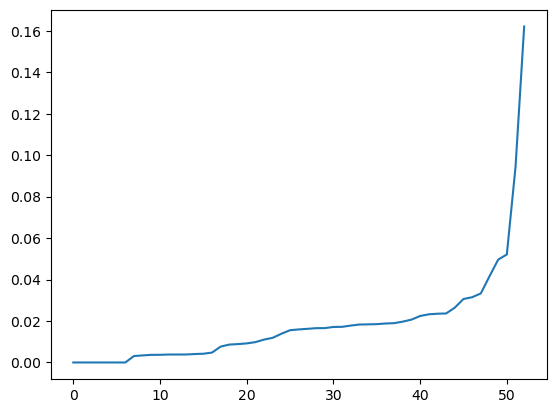

In [21]:
importances_sorted = np.sort(importances)
plt.plot(importances_sorted)
plt.savefig("FeatureImportances/sorted_importances_No_OPC.png")

In [20]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 10)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:50} Importance: {}'.format(*pair)) for pair in feature_importances];

#And save them to a csv for later use
df_importances = pd.DataFrame(data= feature_importances,columns = ["Name","Importance"])
df_importances.to_csv(f"FeatureImportances/{case}_NO_OPC.csv")

Variable: N_120                                              Importance: 0.1620727295
Variable: Network_Line_Out_N_118_N_121_cac1                  Importance: 0.0942152872
Variable: 102_PV_2                                           Importance: 0.0521062327
Variable: Network_Line_Out_N_103_N_124_cac1                  Importance: 0.0496057994
Variable: 122_WIND_1                                         Importance: 0.0415641599
Variable: Network_Line_Out_N_109_N_111_cac1                  Importance: 0.0333075988
Variable: N_109                                              Importance: 0.0314753713
Variable: 102_PV_1                                           Importance: 0.0306253173
Variable: 104_PV_1                                           Importance: 0.0264531509
Variable: N_106                                              Importance: 0.0236457518
Variable: N_105                                              Importance: 0.0235164453
Variable: N_118                                       